<a href="https://colab.research.google.com/github/bkabhilash0/Covid-Survival-Prediction/blob/main/Covid_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Dataset source: https://www.kaggle.com/datasets/meirnizri/covid19-dataset


The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

- sex: 1 for female and 2 for male.
- age: of the patient.
- classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
- patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
- pneumonia: whether the patient already have air sacs inflammation or not.
- pregnancy: whether the patient is pregnant or not.
- diabetes: whether the patient has diabetes or not.
- copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
- asthma: whether the patient has asthma or not.
- inmsupr: whether the patient is immunosuppressed or not.
- hypertension: whether the patient has hypertension or not.
- cardiovascular: whether the patient has heart or blood vessels related disease.
- renal chronic: whether the patient has chronic renal disease or not.
- other disease: whether the patient has other disease or not.
- obesity: whether the patient is obese or not.
- tobacco: whether the patient is a tobacco user.
- usmr: Indicates whether the patient treated medical units of the first, second or third level.
- medical unit: type of institution of the National Health System that provided the care.
- intubed: whether the patient was connected to the ventilator.
- icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
- date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

## Import the Dataset

In [ ]:
data = pd.read_csv("Covid_Data.csv")

In [ ]:
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [ ]:
data.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

## Remove the Missing values and Clean the Data

In [ ]:
pre_data = data.copy()

In [ ]:
pre_data['DEATH'] = [0 if val == '9999-99-99' else 1 for val in pre_data['DATE_DIED']]

In [ ]:
pre_data.tail()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,7,97,0
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,1,2,2,2,2,2,7,2,0
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,7,97,0
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,7,97,0
1048574,2,13,2,1,9999-99-99,97,2,52,97,2,...,2,2,2,2,2,2,2,7,97,0


### Drop the Date Died Column

In [ ]:
pre_data.drop(['DATE_DIED'],inplace=True,axis=1)

In [ ]:
pre_data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,97,1,65,2,2,2,...,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,97,1,72,97,2,2,...,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,1,2,55,97,1,2,...,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,97,2,53,2,2,2,...,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,97,2,68,97,1,2,...,2,1,2,2,2,2,2,3,97,1


### Missing Values are encoded as 97,98,99 - Find the % of Missing values in Each Column

In [ ]:
def showMissingValueStats():
    cols = []
    percent = []
    c = 0

    for col in pre_data.columns:
        cols.append(col)
        vals = []
        temp = pre_data[col].value_counts()
        if 97 in temp.index:
            vals.append(97)
        if 98 in temp.index:
            vals.append(98)
        if 99 in temp.index:
            vals.append(99)

        missing = temp[vals].sum()
        percent.append((missing / len(pre_data[col])) * 100)
         
    missing_stats = pd.DataFrame(list(zip(cols,percent)),columns=['Column','Null Percentage'])
    return missing_stats.sort_values('Null Percentage',ascending=False)

In [ ]:
showMissingValueStats()

,Column,Null Percentage
19,ICU,81.637651
4,INTUBED,81.622106
7,PREGNANT,50.283957
5,PNEUMONIA,1.526166
13,OTHER_DISEASE,0.481129
11,INMSUPR,0.324631
8,DIABETES,0.318337
17,TOBACCO,0.307083
12,HIPERTENSION,0.296021
14,CARDIOVASCULAR,0.293350


### Remove the Attributes with more than 50% of Missing Values

In [ ]:
pre_data.drop(['ICU','INTUBED','PREGNANT'],inplace=True,axis=1)
pre_data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DEATH
0,2,1,1,1,1,65,2,2,2,2,1,2,2,2,2,2,3,1
1,2,1,2,1,1,72,2,2,2,2,1,2,2,1,1,2,5,1
2,2,1,2,2,2,55,1,2,2,2,2,2,2,2,2,2,3,1
3,2,1,1,1,2,53,2,2,2,2,2,2,2,2,2,2,7,1
4,2,1,2,1,2,68,1,2,2,2,1,2,2,2,2,2,3,1


In [ ]:
showMissingValueStats()

,Column,Null Percentage
4,PNEUMONIA,1.526166
11,OTHER_DISEASE,0.481129
9,INMSUPR,0.324631
6,DIABETES,0.318337
15,TOBACCO,0.307083
10,HIPERTENSION,0.296021
12,CARDIOVASCULAR,0.293350
13,OBESITY,0.289154
14,RENAL_CHRONIC,0.286675
7,COPD,0.286389


In [ ]:
pre_data.shape

(1048575, 18)

### Now Drop the rows with Missing Values

In [ ]:
for col in pre_data.columns:
    condition = pre_data[(pre_data[col] == 97) | (pre_data[col] == 98) | (pre_data[col] == 99)]
    pre_data.drop(condition.index,inplace=True)

In [ ]:
pre_data.shape

(1024829, 18)

In [ ]:
showMissingValueStats()

,Column,Null Percentage
0,USMER,0.0
1,MEDICAL_UNIT,0.0
16,CLASIFFICATION_FINAL,0.0
15,TOBACCO,0.0
14,RENAL_CHRONIC,0.0
13,OBESITY,0.0
12,CARDIOVASCULAR,0.0
11,OTHER_DISEASE,0.0
10,HIPERTENSION,0.0
9,INMSUPR,0.0


### Encode the 2's as 0 and also create the Hospitalized Feature

In [ ]:
def getUniqueValues():
    cols_unique = []
    unique_values = []

    for col in pre_data.drop(axis=1, columns=['MEDICAL_UNIT', 'AGE']).columns:
        cols_unique.append(col)
        unique_values.append(pre_data[col].unique())

    df_uniques = pd.DataFrame(list(zip(cols_unique, unique_values)),
                   columns =['cols_unique', 'unique_values'])

    return df_uniques

In [ ]:
change_cols = ['PATIENT_TYPE', 'PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE',
               'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']

for col in change_cols:
    pre_data[col] = pre_data[col].apply(lambda x: 0 if x==2 else (np.nan if x!=1 else x))

In [ ]:
getUniqueValues()

,cols_unique,unique_values
0,USMER,"[2, 1]"
1,SEX,"[1, 2]"
2,PATIENT_TYPE,"[1, 0]"
3,PNEUMONIA,"[1, 0]"
4,DIABETES,"[0, 1]"
5,COPD,"[0, 1]"
6,ASTHMA,"[0, 1]"
7,INMSUPR,"[0, 1]"
8,HIPERTENSION,"[1, 0]"
9,OTHER_DISEASE,"[0, 1]"


In [ ]:
pre_data['HOSPITALIZED'] = pre_data['PATIENT_TYPE']
pre_data.drop(columns='PATIENT_TYPE', inplace=True)

In [ ]:
pre_data.head()

,USMER,MEDICAL_UNIT,SEX,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DEATH,HOSPITALIZED
0,2,1,1,1,65,0,0,0,0,1,0,0,0,0,0,3,1,1
1,2,1,2,1,72,0,0,0,0,1,0,0,1,1,0,5,1,1
2,2,1,2,0,55,1,0,0,0,0,0,0,0,0,0,3,1,0
3,2,1,1,0,53,0,0,0,0,0,0,0,0,0,0,7,1,1
4,2,1,2,0,68,1,0,0,0,1,0,0,0,0,0,3,1,1


In [ ]:
pre_data['USMER'].unique()

array([0, 1], dtype=int64)

In [ ]:
change_cols2 = ['USMER']

for col in change_cols2:
    pre_data[col] = pre_data[col].apply(lambda x: 0 if x==2 else x)

In [ ]:
pre_data.drop('MEDICAL_UNIT',axis=1,inplace=True)

In [ ]:
pre_data.head()

,USMER,SEX,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DEATH,HOSPITALIZED
0,0,1,1,65,0,0,0,0,1,0,0,0,0,0,3,1,1
1,0,2,1,72,0,0,0,0,1,0,0,1,1,0,5,1,1
2,0,2,0,55,1,0,0,0,0,0,0,0,0,0,3,1,0
3,0,1,0,53,0,0,0,0,0,0,0,0,0,0,7,1,1
4,0,2,0,68,1,0,0,0,1,0,0,0,0,0,3,1,1


In [ ]:
pre_data['POSITIVE'] = pre_data['CLASIFFICATION_FINAL'].apply(lambda x: 1 if x <= 3 else 0)

In [ ]:
pre_data.drop(columns=['CLASIFFICATION_FINAL'],inplace=True)

In [ ]:
pre_data.head()

,USMER,SEX,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,DEATH,HOSPITALIZED,POSITIVE
0,0,1,1,65,0,0,0,0,1,0,0,0,0,0,1,1,1
1,0,2,1,72,0,0,0,0,1,0,0,1,1,0,1,1,0
2,0,2,0,55,1,0,0,0,0,0,0,0,0,0,1,0,1
3,0,1,0,53,0,0,0,0,0,0,0,0,0,0,1,1,0
4,0,2,0,68,1,0,0,0,1,0,0,0,0,0,1,1,1


In [ ]:
# Female is 1 and Male 0
pre_data['SEX'] = pre_data['SEX'].apply(lambda x: 1 if x == 1 else 0)

In [ ]:
pre_data.head()

,USMER,SEX,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,DEATH,HOSPITALIZED,POSITIVE
0,0,1,1,65,0,0,0,0,1,0,0,0,0,0,1,1,1
1,0,0,1,72,0,0,0,0,1,0,0,1,1,0,1,1,0
2,0,0,0,55,1,0,0,0,0,0,0,0,0,0,1,0,1
3,0,1,0,53,0,0,0,0,0,0,0,0,0,0,1,1,0
4,0,0,0,68,1,0,0,0,1,0,0,0,0,0,1,1,1


In [ ]:
pre_data.isnull().sum(axis=0)

USMER             0
SEX               0
PNEUMONIA         0
AGE               0
DIABETES          0
COPD              0
ASTHMA            0
INMSUPR           0
HIPERTENSION      0
OTHER_DISEASE     0
CARDIOVASCULAR    0
OBESITY           0
RENAL_CHRONIC     0
TOBACCO           0
DEATH             0
HOSPITALIZED      0
POSITIVE          0
dtype: int64

In [ ]:
pre_data.shape

(1024829, 17)

## Model Building

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
X = pre_data.drop('DEATH',axis=1)
y = pre_data['DEATH']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

### Logistic Regression

In [ ]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
log_predictions = log_model.predict(X_test)

In [ ]:
print(accuracy_score(y_test,log_predictions))

0.9374497884201932


In [ ]:
print(classification_report(y_test,log_predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    285315
           1       0.59      0.43      0.50     22134

    accuracy                           0.94    307449
   macro avg       0.77      0.70      0.73    307449
weighted avg       0.93      0.94      0.93    307449



In [ ]:
conf_mat = confusion_matrix(y_test,log_predictions)
print(confusion_matrix(y_test,log_predictions))

[[278630   6685]
 [ 12546   9588]]


In [ ]:
def showConfMat(conf_mat):
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    plt.show()

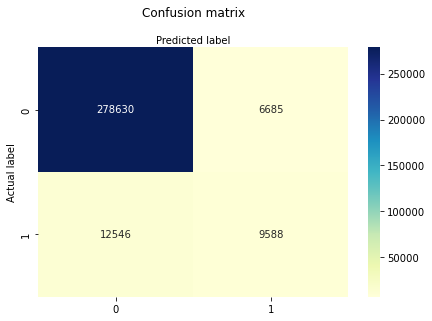

In [ ]:
showConfMat(conf_mat)
# Text(0.5,257.44,'Predicted label');

In [ ]:
def showRocCurve(model,X_test,y_test):
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

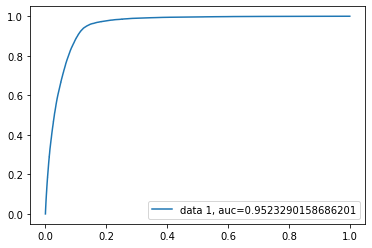

In [ ]:
showRocCurve(log_model,X_test,y_test,)

### Decission Tree Classifier

In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
tree_predictions = tree.predict(X_test)

In [ ]:
print(accuracy_score(y_test,tree_predictions))

0.9313089325384047


In [ ]:
print(classification_report(y_test,tree_predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96    285315
           1       0.53      0.40      0.46     22134

    accuracy                           0.93    307449
   macro avg       0.74      0.69      0.71    307449
weighted avg       0.92      0.93      0.93    307449



In [ ]:
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}

In [ ]:
tree_cv = GridSearchCV(tree,param_grid)

In [ ]:
tree_cv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [ ]:
tree_cv.best_estimator_

DecisionTreeClassifier(max_depth=8)

In [ ]:
tree_cv.best_score_

0.9380886001840029

In [ ]:
tree_cv.best_params_

{'criterion': 'gini', 'max_depth': 8}

In [ ]:
tree_cv_pred = tree_cv.predict(X_test)
print(accuracy_score(y_test,tree_cv_pred))

0.9384710960191771


In [ ]:
print(classification_report(y_test,tree_cv_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    285315
           1       0.61      0.41      0.49     22134

    accuracy                           0.94    307449
   macro avg       0.78      0.70      0.73    307449
weighted avg       0.93      0.94      0.93    307449



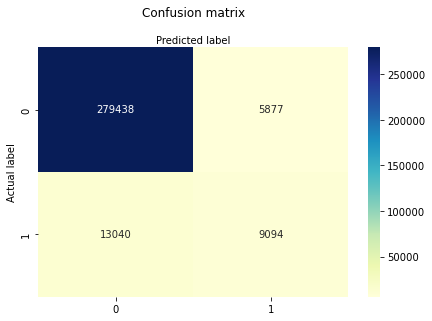

In [ ]:
showConfMat(confusion_matrix(y_test,tree_cv_pred))

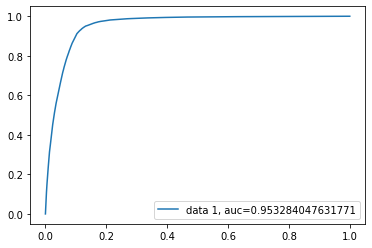

In [ ]:
showRocCurve(tree_cv,X_test,y_test)

### AdaBoost

In [ ]:
ada_boost = AdaBoostClassifier()

In [ ]:
ada_boost.fit(X_train,y_train)

AdaBoostClassifier()

In [ ]:
ada_boost_pred = ada_boost.predict(X_test)

In [ ]:
print(accuracy_score(y_test,ada_boost_pred))

0.9362138110711045


In [ ]:
print(classification_report(y_test,ada_boost_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97    285315
           1       0.57      0.49      0.52     22134

    accuracy                           0.94    307449
   macro avg       0.76      0.73      0.74    307449
weighted avg       0.93      0.94      0.93    307449



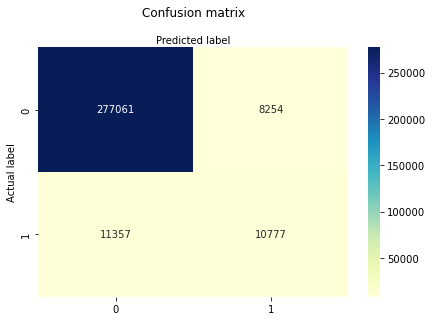

In [ ]:
showConfMat(confusion_matrix(y_test,ada_boost_pred))

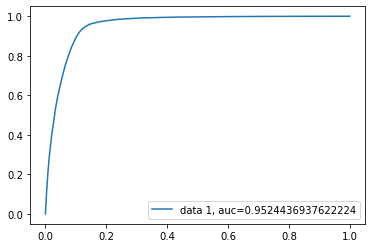

In [ ]:
showRocCurve(ada_boost,X_test,y_test)